<a href="https://colab.research.google.com/github/hariharan2044/Fundamental/blob/main/Bank%20Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [13]:
df.duplicated('CustomerId').sum()

0

In [14]:
df=df.set_index('CustomerId')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df.replace({'Geography': {'France':2,'Germany':1,'Spain':0}},inplace=True)

In [21]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [26]:
df['Gender'].value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

In [27]:
df.replace({'Gender':{'Male':0,'female':1}},inplace=True)

In [28]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [29]:
df.replace({'Num Of  Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [30]:
df['Has Credit Card'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    1
           ..
15606229    1
15569892    1
15584532    0
15682355    1
15628319    1
Name: Has Credit Card, Length: 10000, dtype: int64>

In [31]:
df['Is Active Member'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    1
15647311    1
15619304    0
15701354    0
15737888    1
           ..
15606229    0
15569892    1
15584532    1
15682355    0
15628319    0
Name: Is Active Member, Length: 10000, dtype: int64>

In [35]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [41]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

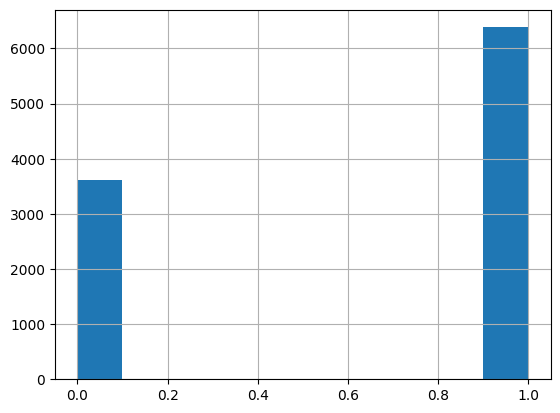

In [43]:
df['Zero Balance'].hist()

In [45]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [48]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [50]:
X=df.drop(['Surname','Churn'],axis=1)

In [55]:
y=df['Churn']

In [58]:
X.shape,y.shape

((10000, 11), (10000,))

In [60]:
df['Churn'].value_counts()


0    7963
1    2037
Name: Churn, dtype: int64

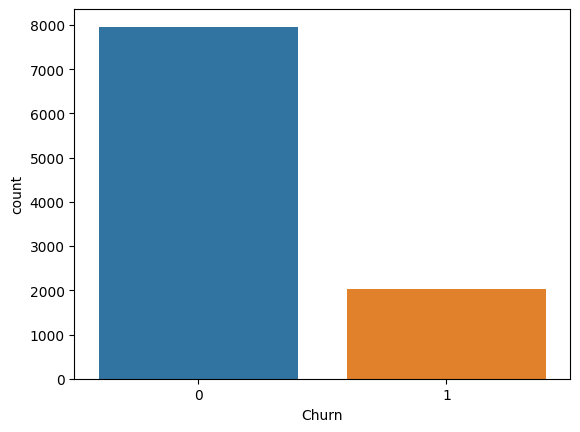

In [61]:
sns.countplot(x='Churn',data=df);

In [64]:
X.shape,y.shape

((10000, 11), (10000,))

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [80]:
rus=RandomUnderSampler(random_state=2529)

In [81]:
X_rus,y_rus = rus.fit_resample(X,y)

In [82]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [83]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64